In [1]:
import ipyvolume as ipv
import ipyvolume.pylab as p3
import nrrd
import re
import tlib_skeleton as tlu  # tommaso's library
import warnings
import os
import SimpleITK as sitk
import matplotlib.pyplot as plt
import gui 
%matplotlib notebook
warnings.filterwarnings('ignore')

In [2]:
# Load lung
data_directory = "/home/butlera/data/HuBMAP/CT/rochester/D175_CT_Scan/D175_Right_Lung_CT_DICOMS/IMediaExport/DICOM/PAT_0000/STD_0000/SER_0001/OBJ_0001/"
# Get the list of files belonging to a specific series ID.
reader = sitk.ImageSeriesReader()
# Use the functional interface to read the image series.
img_D175 = sitk.ReadImage(reader.GetGDCMSeriesFileNames(data_directory))

In [3]:
# Load skeleton analysis
d175_skeleton_path = os.path.join('/home/butlera/Projects/HuBMAP/processed/d175_skeleton_branches.csv')
assert os.path.isfile(d175_skeleton_path)
d175_skeleton = tlu.Skeleton(d175_skeleton_path)

In [4]:
# Get the branch points and put in required format for region growing algorithm
seed_pts = d175_skeleton.get_points_w_connectivity()
seed_pts2 = []
seed_pts[0].size
for i in range(seed_pts[0].size):
    seed_pts2.append((int(seed_pts[0][i]), int(seed_pts[1][i]), int(seed_pts[2][i])))

In [5]:
seg_implicit_thresholds = sitk.ConfidenceConnected(
    img_D175,
    seedList=seed_pts2,
    numberOfIterations=1,
    multiplier=1,
    initialNeighborhoodRadius=1,
    replaceValue=1
)

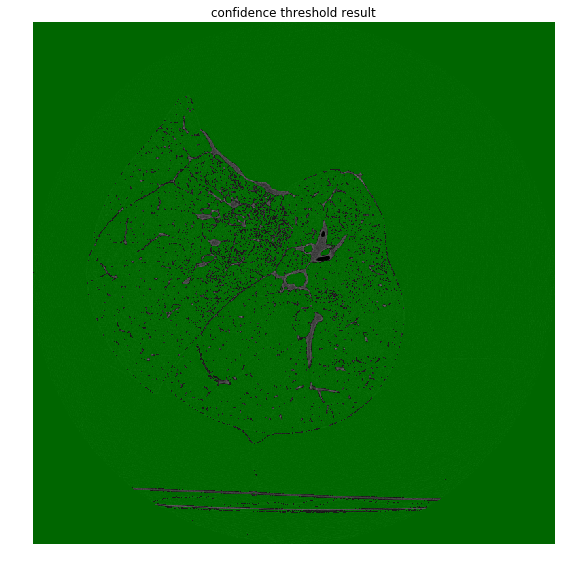

In [7]:
img_int = sitk.Cast(sitk.RescaleIntensity(img_D175), seg_implicit_thresholds.GetPixelID())
gui.MultiImageDisplay(image_list = [sitk.LabelOverlay(img_int, seg_implicit_thresholds)],                   
                      title_list = ['confidence threshold result'])